# Sheet 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

## 1 Kernel Density Estimation
(a)

In [2]:
def biweight(x, mu, w):
    """biweight kernel at mean mu, with bandwidth w evaluated at x"""
    #TODO: implement the quartic (biweight) kernel
    return 15/(16*w)*(1 - ((x-mu)/w)**2)**2
#define support for array; then x in an array

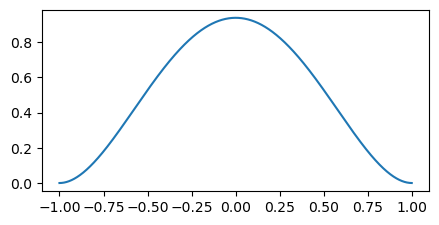

In [3]:
# TODO plot the kernel
mu = 0
w = 1
x = np.arange(-1.0, 1.0, 0.001)
y = biweight(x, mu, w)

fig, ax = plt.subplots(figsize=(5,5))
plt.plot(x, y) #more args for prettier plots
ax.set_aspect('equal')
plt.show()

(b)

(array([5.000e+00, 8.000e+00, 1.500e+01, 3.300e+01, 6.300e+01, 1.030e+02,
        1.710e+02, 2.460e+02, 3.600e+02, 4.760e+02, 5.460e+02, 5.370e+02,
        5.560e+02, 5.210e+02, 4.150e+02, 3.630e+02, 2.200e+02, 1.550e+02,
        1.070e+02, 4.300e+01, 3.700e+01, 6.000e+00, 6.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.036e+03, 1.429e+03, 7.380e+02, 4.560e+02,
        2.870e+02, 1.870e+02, 1.480e+02, 1.040e+02, 8.300e+01, 5.600e+01,
        5.600e+01, 4.500e+01, 3.800e+01, 4.100e+01, 2.200e+01, 2.500e+01,
        1.200e+01, 1.500e+01, 2.000e+01, 1.600e+01, 1.400e+01, 8.000e+00,
        9.000e+00, 1.300e+01, 8.000e+00, 1.000e+01, 7.000e+00, 4.000e+00,
        6.000e+00, 2.000e+00, 7.000e+00, 6.000e+00, 3.000e+00, 7.000e+00,
        9.000e+00, 1.000e+01, 5.000e+00, 5.000e+00, 1.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 1.000e+0

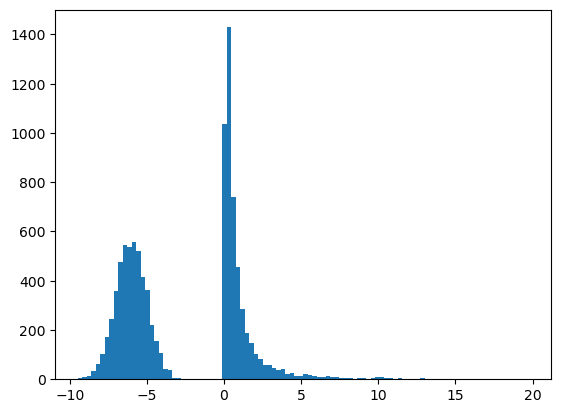

In [15]:
# load the data
data = np.load("data/samples.npy")
'''data50 = data[:50]
print(f'{data.shape=}, {data50.shape=}')
print(data50)
print(len(data))'''
plt.hist(data, bins=100)

In [9]:
'''for x_i in data50:
    x = np.arange(-10.0, 20.0, 0.001)
    print(biweight(x-x_i, mu, w))'''

'for x_i in data50:\n    x = np.arange(-10.0, 20.0, 0.001)\n    print(biweight(x-x_i, mu, w))'

In [6]:
'''def kde(x, obs, w):
    print(obs.shape)
    print(np.ones(obs.shape).shape)
    # TODO: implement the KDE with the biweight kernel
    # density = sum([biweight(x_i, mu, w) for x_i in obs])
    #biweight_vec = np.vectorize(biweight)
    #x_vec = x - obs
    density = 1/len(obs) * sum(biweight(x, mu=x_i, w=w) for x_i in obs)
    return density'''
#use with corrected biweigth kernel
def kde(x, obs, w):
    return np.mean([biweight(x,d,w) for d in obs], axis=0)

(50,)
(50,)


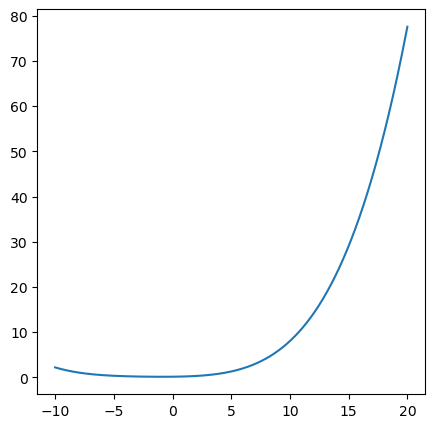

In [12]:
# TODO: compute and plot the kde on the first 50 data points

x = np.arange(-10.0, 20.0, 0.01)
y = kde(x, obs=data50, w=1)
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(x, y) #more args for prettier plots
#ax.set_aspect('equal')
plt.show()
# TODO: explore what happens when you increase the number of points


## Compare with Scipy KDE

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlim'

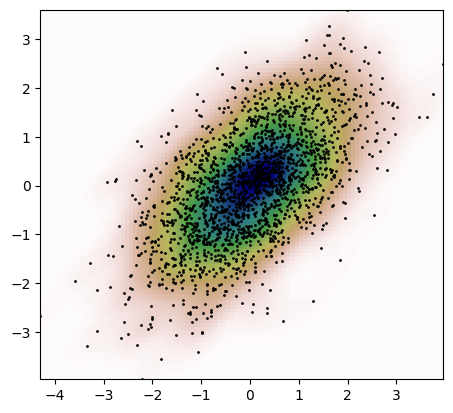

In [8]:
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
x.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [ ]:
x = np.arange(-10.0, 20.0, 0.01)
y = gaussian_kde(data50)(x)
print(y)
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(x, y) #more args for prettier plots
#ax.set_aspect('equal')
plt.show()

## 3 Mean-Shift
(b) Bonus

In [ ]:
# TODO: implement the update to the local mean

def mean_shift_step(x, xt, r=1):
    """
    A single step of mean shift, moving every point in xt to the local mean of points in x within a radious of r.
    
    Parameters
    ----------
    x : np.ndarray
        Array of points underlying the KDE, shape (d, N1)
    xt : np.ndarray
        Current state of the mean shift algorithm, shape (d, N2)
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray
        the points after the mean-shift step
    """
    # NOTE: For the excercise you only need to implement this for d == 1. 
    #       If you want some extra numpy-practice, implement it for arbitrary dimension
    
    assert xt.shape[0] == x.shape[0], f'Shape mismatch: {x.shape[0]}!={xt.shape[0]}'
    
    # TODO: compute a N by N matrix 'dist' of distances, 
    #       such that dists[i, j] is the distance between x[i] and xt[j]
    
    # TODO: threshold the distances with r to get an array of masks for every data point
    
    # TODO: compute the number of points in x within radius r of each xt
    
    # TODO: compute the local means by summing over the neighbors of each element in xt 
    #       and dividing by the number of neighbors
    
    return local_means
    

In [ ]:
# load the data
data = np.load("data/samples.npy")
x = data[:200]  # use e.g. the first 200 points
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1


# TODO: plot the trajectories


In [ ]:
# TODO: repeat the above for "blurring" mean shift


## 4 K-Means

(b)

In [ ]:
from sklearn.cluster import KMeans

def kmeans_step(x, k, c=None, init='random'):
    """
    K-Means clustering on a p x N data matrix.
    
    Parameters
    ----------
    x : np.ndarray
        Data matrix of shape (p, N).
    k : int
        Number of cluster.
    c : np.ndarray, optional
        Current cluster centers. If None, the initialization as specified by 'init' will be used.
    init: str
        The initialization method to be used if c is None.
        
    Returns
    -------
    float, np.ndarray
        cost after the step, updated cluster centers
    """
    
    if c is not None: 
        assert c.shape[1] == k
        
    # Note: the documentation is your friend: 
    #       https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
    # TODO: set n_cluster, init, n_init and max_iter appropriately
    single_step_kmeans = KMeans(
        n_clusters=, 
        init=, 
        max_iter=,
        n_init=,
    )
    
    # TODO call the single_step_kmeans
    
    # TODO get the current energy (you don't have to compute it - it's stored in single_step_kmeans)
    E = 
    
    # TODO read out cluster centers 
    c = 
    
    return E, c 
    

In [ ]:
# load the data (you can try both with the full normalized feature and the 2d umap projection)

features = np.load('data/dijet_features_normalized.npy')  # full features
# features = np.load('data/dijet_features_umap.npy')      # umap projection

print(f'{features.shape=}')

In [ ]:
def kmeans(x, k, max_steps=100, init='random'):
    c = None
    energies = []  # list of energies over the iterations. 
    for i in range(max_steps):
        # Call the kmeans_step implemented above to get the energy and the next cluster centers
        E, c = kmeans_step(x, k=k, c=c, init=init)
        energies.append(E)
        
        # Stop the loop if there was no improvement
        if i>=2 and energies[-1] == energies[-2]:
            break
    energies = np.array(energies)
    return energies  # return array of energies


for k in [3, 5, 10, 20]:
    for init in ['k-means++', 'random']:
        # TODO: for the given k and init, run k-means 20 times or more (using the kmeans function above)
        #       and plot the resulting energy trajectores
        